In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os

## Load data file into dataframe

In [2]:
# LOAD DATA FROM ALL FILES IN THE ROOT FOLDER. IF ONE FILE CONTAINS MULTIPLE SUBJECTS, THEN ALL OF THEM WILL BE LOADED.
root_path = "/Users/ajay/Downloads/imagenet_blur_data/"
dfs = []
for fn in os.listdir(root_path):
	f = open(root_path + fn, "r")
	if fn.startswith("jatos") and fn.endswith(".txt"):
		lines = f.readlines()
		for l in lines:
			# write into temp file if valid
			if l.startswith('['):
				with open(root_path + "temp.txt", "w") as temp_file:
					temp_file.write(l)
			with open(root_path + "temp.txt", "r") as temp_file:
				dfs.append(pd.read_json(temp_file, orient='records'))

In [3]:
print(len(dfs))

50


In [4]:
dfs[0].head(10)

,url,meta,sender,sender_type,sender_id,do-you-agree-to-participate-and-are-you-above-18-years-old.-undefined,what-describes-you-best-(male-female-others-prefer-not-to-say),please-enter-your-age-in-years.-(digits-only),do-you-need-glassescontact-lenses-to-read,are-you-wearing-them-(put-,...,response,response_action,parameter0,looper,category,mode,filename,correctResponse,correct,order
0,{'srid': '2588'},"{'labjs_version': '20.2.4', 'labjs_build': {'f...",Agreement,html.Page,0.0,1.0,Male,44.0,no,NA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Instructions for Categorization Tutorial,html.Page,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,ScreenCategorizationTutorial,canvas.Screen,2.0,NaN,NaN,NaN,NaN,NaN,...,click,click @fixation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Stimulus & Response,html.Screen,300.0,NaN,NaN,NaN,NaN,NaN,...,bear,click button#bear,1.0,0.0,bear,3.0,23_blur_3_bear.JPEG,bear,1.0,NaN
4,NaN,NaN,inter-stimulus,canvas.Screen,301.0,NaN,NaN,NaN,NaN,NaN,...,click,click @fixation,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,Trial,flow.Sequence,30.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,Stimulus & Response,html.Screen,310.0,NaN,NaN,NaN,NaN,NaN,...,bird,click button#bird,1.0,1.0,bird,9.0,41_blur_9_bird.JPEG,bird,1.0,NaN
7,NaN,NaN,inter-stimulus,canvas.Screen,311.0,NaN,NaN,NaN,NaN,NaN,...,click,click @fixation,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,Trial,flow.Sequence,31.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,Stimulus & Response,html.Screen,320.0,NaN,NaN,NaN,NaN,NaN,...,dog,click button#dog,1.0,2.0,dog,3.0,1_blur_3_dog.JPEG,dog,1.0,NaN


In [5]:
count_asc = 0
for df in dfs:
	srid = df['url'][0]
	if df.iloc[500]['order'] == -1:
		print("{} Order: {}".format(srid, "D"))
	else:
		print("{} Order: {}".format(srid, "A"))
		count_asc += 1

print("---------\nTOTAL ASCENDING = {}, DESCENDING = {}".format(count_asc, len(dfs) - count_asc))

{'srid': '2588'} Order: D
{'srid': '2586'} Order: A
{'srid': '2584'} Order: D
{'srid': '2581'} Order: A
{'srid': '2580'} Order: A
{'srid': '2578'} Order: A
{'srid': '2570'} Order: D
{'srid': '2562'} Order: D
{'srid': '2560'} Order: A
{'srid': '2555'} Order: D
{'srid': '2642'} Order: D
{'srid': '2639'} Order: A
{'srid': '2638'} Order: A
{'srid': '2637'} Order: D
{'srid': '2632'} Order: D
{'srid': '2631'} Order: A
{'srid': '2630'} Order: A
{'srid': '2629'} Order: D
{'srid': '2628'} Order: D
{'srid': '2627'} Order: A
{'srid': '2625'} Order: D
{'srid': '2624'} Order: A
{'srid': '2623'} Order: D
{'srid': '2622'} Order: A
{'srid': '2621'} Order: D
{'srid': '2620'} Order: D
{'srid': '2619'} Order: A
{'srid': '2617'} Order: D
{'srid': '2616'} Order: A
{'srid': '2615'} Order: A
{'srid': '2613'} Order: D
{'srid': '2612'} Order: D
{'srid': '2611'} Order: D
{'srid': '2610'} Order: D
{'srid': '2609'} Order: A
{'srid': '2607'} Order: A
{'srid': '2606'} Order: D
{'srid': '2605'} Order: A
{'srid': '26

## Split data (after skipping first 10 from each) into training, motorTime, and time block dataframes

In [6]:
# iterate through rows of df and store stim response record for each in appropriate block
def get_start_index(df, blockname):
	return df.loc[df['sender'] == "Screen" + blockname].index[0]

all_start_indices = []
for df in dfs:
	# get all start indices
	cat_idx = get_start_index(df, "CategorizationTutorial")
	# motortime_idx = get_start_index(df, "MotorTime")
	t0_idx = get_start_index(df, "0")
	t400_idx = get_start_index(df, "400")
	t600_idx = get_start_index(df, "600")
	t800_idx = get_start_index(df, "800")
	t1000_idx = get_start_index(df, "1000")
	# start_indices = [cat_idx, motortime_idx, t0_idx, t400_idx, t600_idx, t800_idx, t1000_idx]
	start_indices = [cat_idx, t0_idx, t400_idx, t600_idx, t800_idx, t1000_idx]

	all_start_indices.append(start_indices)
	print(df['url'][0], start_indices)


{'srid': '2588'} [2, 2688, 2055, 1422, 789, 156]
{'srid': '2586'} [2, 155, 788, 1421, 2054, 2687]
{'srid': '2584'} [2, 2688, 2055, 1422, 789, 156]
{'srid': '2581'} [2, 155, 788, 1421, 2054, 2687]
{'srid': '2580'} [2, 155, 788, 1421, 2054, 2687]
{'srid': '2578'} [2, 155, 788, 1421, 2054, 2687]
{'srid': '2570'} [2, 2688, 2055, 1422, 789, 156]
{'srid': '2562'} [2, 2688, 2055, 1422, 789, 156]
{'srid': '2560'} [2, 155, 788, 1421, 2054, 2687]
{'srid': '2555'} [2, 2688, 2055, 1422, 789, 156]
{'srid': '2642'} [2, 2688, 2055, 1422, 789, 156]
{'srid': '2639'} [2, 155, 788, 1421, 2054, 2687]
{'srid': '2638'} [2, 155, 788, 1421, 2054, 2687]
{'srid': '2637'} [2, 2688, 2055, 1422, 789, 156]
{'srid': '2632'} [2, 2688, 2055, 1422, 789, 156]
{'srid': '2631'} [2, 155, 788, 1421, 2054, 2687]
{'srid': '2630'} [2, 155, 788, 1421, 2054, 2687]
{'srid': '2629'} [2, 2688, 2055, 1422, 789, 156]
{'srid': '2628'} [2, 2688, 2055, 1422, 789, 156]
{'srid': '2627'} [2, 155, 788, 1421, 2054, 2687]
{'srid': '2625'} [2,

In [7]:
# Store stimulus response data (after skipping first 10 rows) for each timed block
# blocks = ["cattut", "motortime", "0", "400", "600", "800", "1000"]
blocks = ["cattut", "0", "400", "600", "800", "1000"]
times = [500, 900, 1100, 1300, 1500]
blocked_datas = []

def get_sr_block_data(df, start_idx, n_samples, n_skip=0):
	block_df = df.iloc[start_idx:start_idx + n_samples + 1]
	return block_df[block_df["sender"] == "Stimulus & Response"][n_skip:]

for i, df in enumerate(dfs):
	blocked_data = {}

	for j, block in enumerate(blocks):
		if block == 'cattut':
			blocked_data[block] = get_sr_block_data(df, all_start_indices[i][j], 50*3)
		# elif block == "motortime":
		# 	blocked_data[block] = get_sr_block_data(df, start_indices[i], 16*3)
		else:
			block_df = get_sr_block_data(df, all_start_indices[i][j], 210*3, n_skip = 10)

			# eliminate data with impossible RTs
			block_df = block_df[block_df["duration"] <= times[j-1]+250]
			block_df = block_df[block_df["duration"] > 0]

			blocked_data[block] = block_df

	
	blocked_datas.append(blocked_data)


In [8]:
blocked_datas[1]['0']['response']

186      boat
189       NaN
192      bird
195      boat
198    bottle
        ...  
771       NaN
774       NaN
777       NaN
780       NaN
783       NaN
Name: response, Length: 200, dtype: object

In [9]:
# Replace all NaN values with random category
categories = ["airplane", "bear", "bicycle", "bird", "boat", "bottle", "car", "cat", "chair", "clock", "dog", "elephant", "keyboard", "knife", "oven", "truck"]
for i, blocked_data in enumerate(blocked_datas):
	for j, block in enumerate(blocks[1:]):
		response_idx = blocked_data[block].columns.get_loc("response")
		b = blocked_data[block].values
		n = b[:, response_idx].astype(str) == 'nan'
		b[:, response_idx][n] = np.random.choice(categories, size=np.sum(n))
		blocked_datas[i][block] = pd.DataFrame(b, columns=blocked_data[block].columns)

In [10]:
blocked_datas[1]['0']['response']

0          boat
1          bird
2          bird
3          boat
4        bottle
         ...   
195    airplane
196         car
197         dog
198       clock
199         cat
Name: response, Length: 200, dtype: object

## Observe performance in Cat Tutorial

In [11]:
cat_accs = []
for blocked_data, df in zip(blocked_datas, dfs):
	accuracy_cattut = blocked_data['cattut']['correct'][10:].sum() / len(blocked_data['cattut']['correct'][10:])
	cat_accs.append(accuracy_cattut * 100)
	print("{}: Accuracy on categorization tutorial: {} %".format(df['url'][0], accuracy_cattut * 100))

{'srid': '2588'}: Accuracy on categorization tutorial: 95.0 %
{'srid': '2586'}: Accuracy on categorization tutorial: 67.5 %
{'srid': '2584'}: Accuracy on categorization tutorial: 15.0 %
{'srid': '2581'}: Accuracy on categorization tutorial: 52.5 %
{'srid': '2580'}: Accuracy on categorization tutorial: 72.5 %
{'srid': '2578'}: Accuracy on categorization tutorial: 97.5 %
{'srid': '2570'}: Accuracy on categorization tutorial: 90.0 %
{'srid': '2562'}: Accuracy on categorization tutorial: 60.0 %
{'srid': '2560'}: Accuracy on categorization tutorial: 80.0 %
{'srid': '2555'}: Accuracy on categorization tutorial: 85.0 %
{'srid': '2642'}: Accuracy on categorization tutorial: 95.0 %
{'srid': '2639'}: Accuracy on categorization tutorial: 95.0 %
{'srid': '2638'}: Accuracy on categorization tutorial: 82.5 %
{'srid': '2637'}: Accuracy on categorization tutorial: 77.5 %
{'srid': '2632'}: Accuracy on categorization tutorial: 80.0 %
{'srid': '2631'}: Accuracy on categorization tutorial: 92.5 %
{'srid':

In [12]:
cat_mean_times = []

for i, (blocked_data, df) in enumerate(zip(blocked_datas, dfs)):
	mean_rt_cattut = blocked_data['cattut']['duration'].mean()
	std_rt_cattut = blocked_data['cattut']['duration'].std()
	max_rt_cattut = blocked_data['cattut']['duration'].max()
	min_rt_cattut = blocked_data['cattut']['duration'].min()
	median_rt_cattut = blocked_data['cattut']['duration'].median()
	# print("RT on categorization tutorial:\nMean: {} ms\nSD: {} ms\nmax: {} ms\nmin: {} ms\nmedian: {}".format(mean_rt_cattut, std_rt_cattut, max_rt_cattut, min_rt_cattut, median_rt_cattut))
	print("{}: Mean RT: {}".format(df['url'][0], mean_rt_cattut))
	cat_mean_times.append(mean_rt_cattut)

{'srid': '2588'}: Mean RT: 1862.6435400000112
{'srid': '2586'}: Mean RT: 1826.883899994397
{'srid': '2584'}: Mean RT: 809.7962599998808
{'srid': '2581'}: Mean RT: 1769.6988400026219
{'srid': '2580'}: Mean RT: 1666.5893000022654
{'srid': '2578'}: Mean RT: 1395.7481000020862
{'srid': '2570'}: Mean RT: 1936.9682199856961
{'srid': '2562'}: Mean RT: 2137.8621000065555
{'srid': '2560'}: Mean RT: 3920.3204799945165
{'srid': '2555'}: Mean RT: 3537.9146400067957
{'srid': '2642'}: Mean RT: 1506.361999970675
{'srid': '2639'}: Mean RT: 3287.1850399954724
{'srid': '2638'}: Mean RT: 1939.4471600002375
{'srid': '2637'}: Mean RT: 2752.0656600022635
{'srid': '2632'}: Mean RT: 3572.5121800286183
{'srid': '2631'}: Mean RT: 1706.9797799995226
{'srid': '2630'}: Mean RT: 5504.395119999669
{'srid': '2629'}: Mean RT: 4863.890859999525
{'srid': '2628'}: Mean RT: 4681.147680000186
{'srid': '2627'}: Mean RT: 2604.9095000039324
{'srid': '2625'}: Mean RT: 3811.0581804501326
{'srid': '2624'}: Mean RT: 3523.86587999

## Accuracies and RTs in timed blocks

/var/folders/lk/bpljp3d534xd8_2v7v7m9lgc0000gn/T/ipykernel_37846/1549902655.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


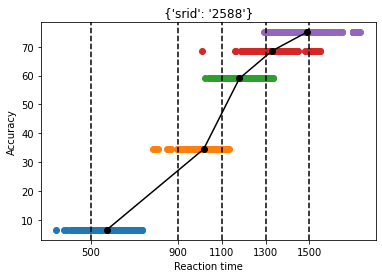

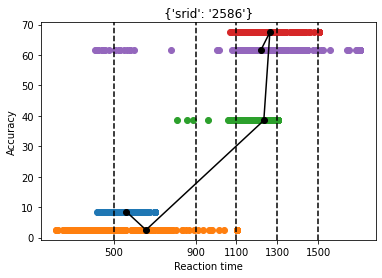

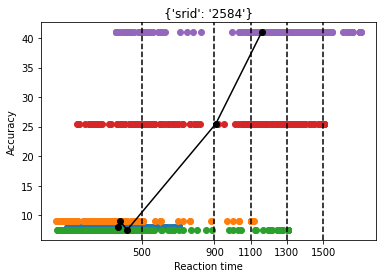

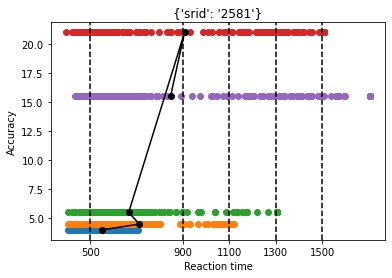

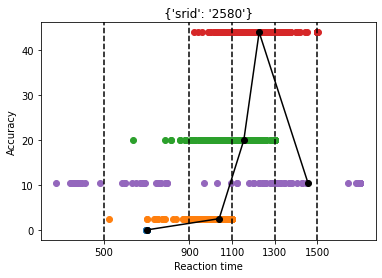

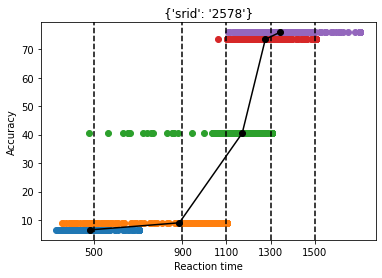

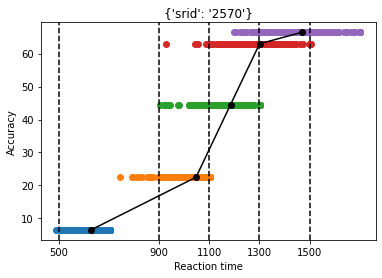

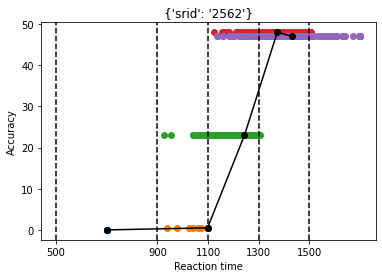

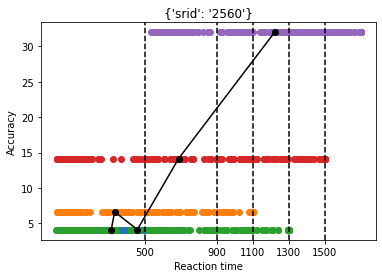

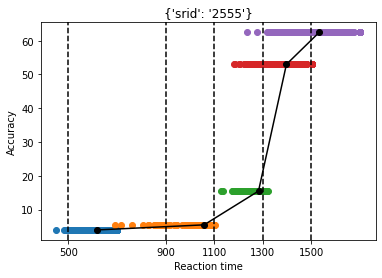

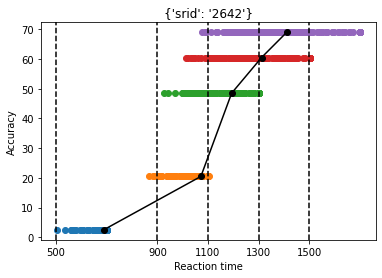

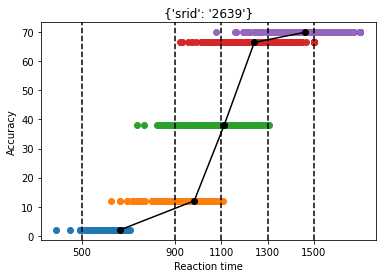

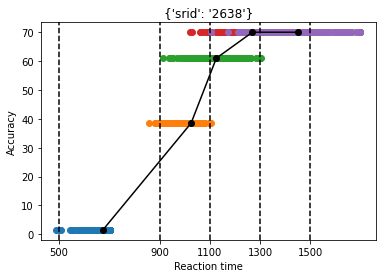

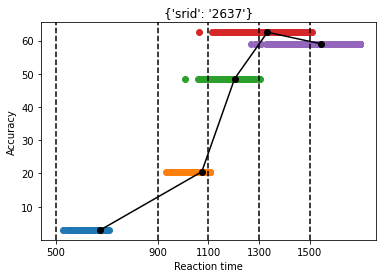

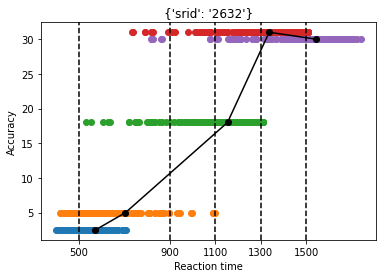

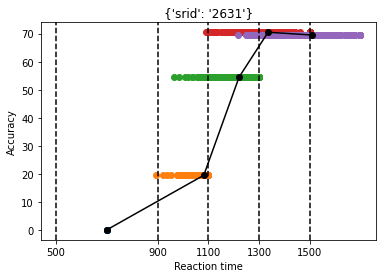

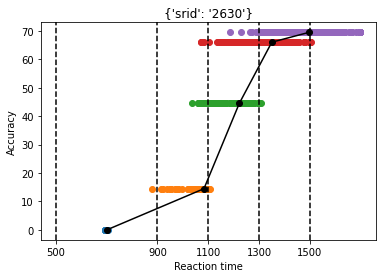

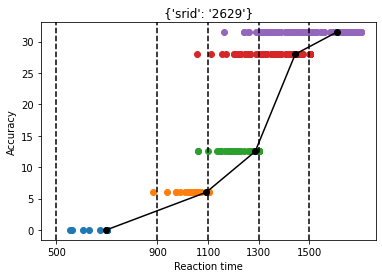

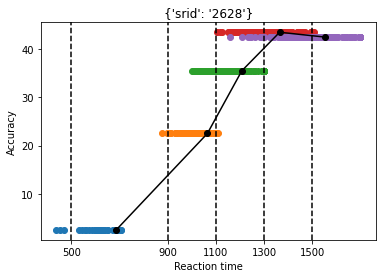

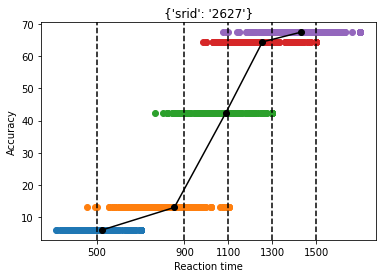

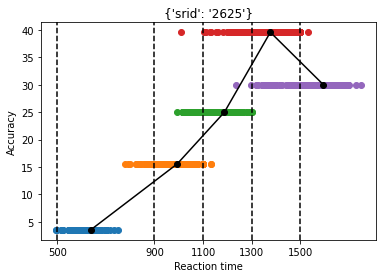

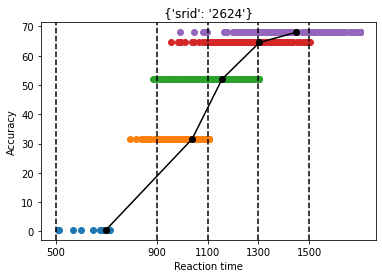

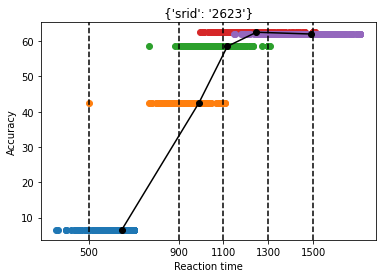

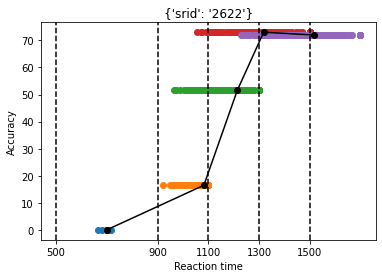

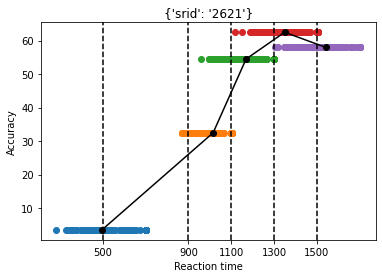

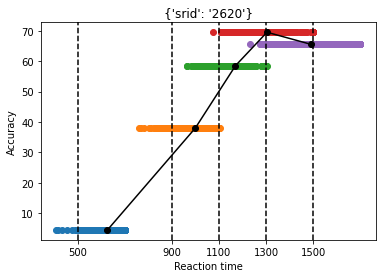

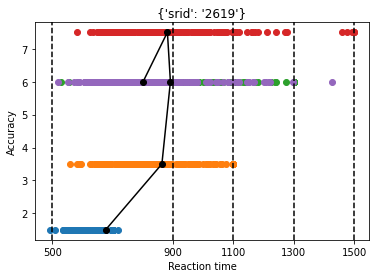

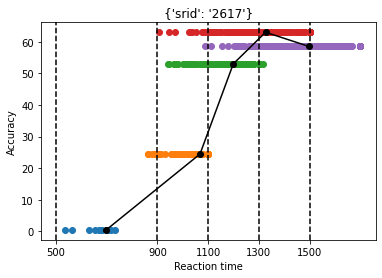

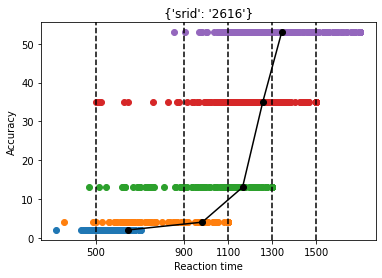

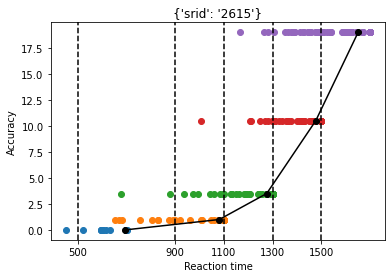

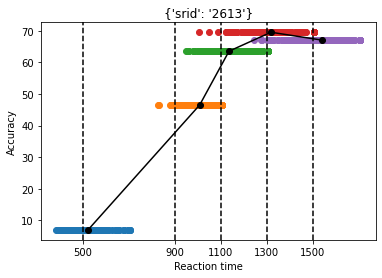

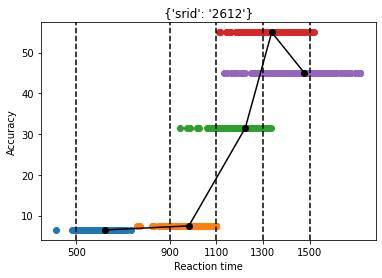

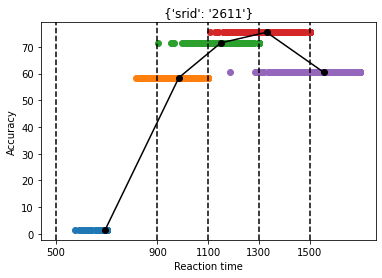

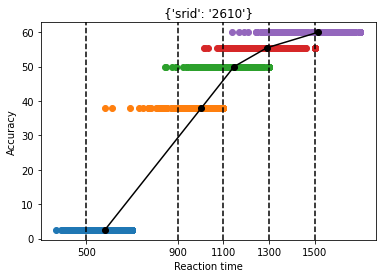

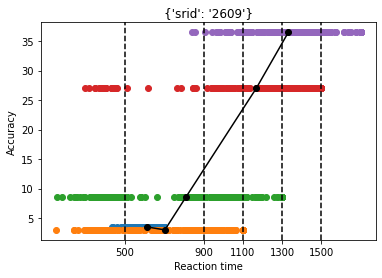

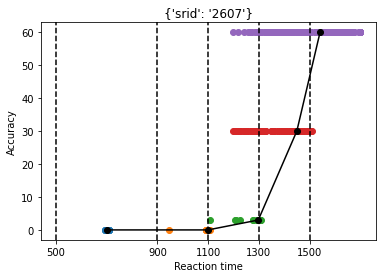

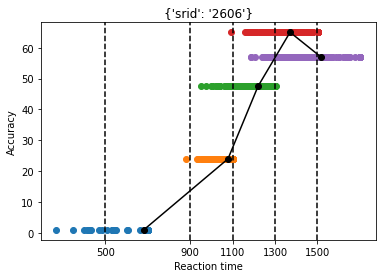

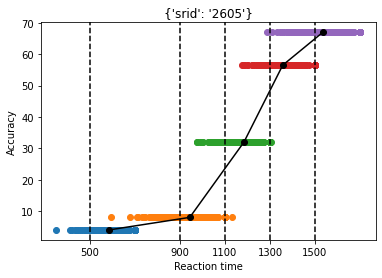

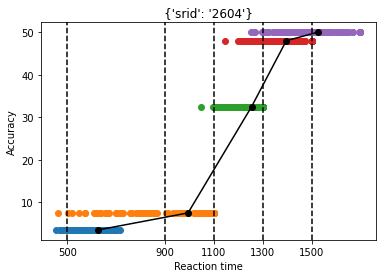

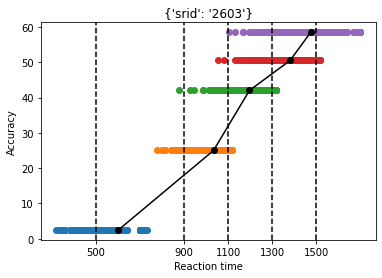

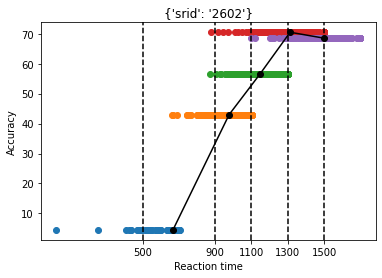

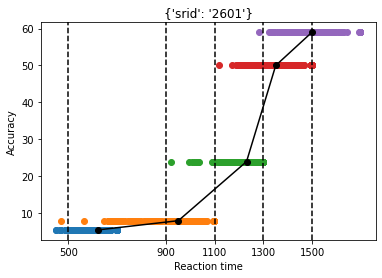

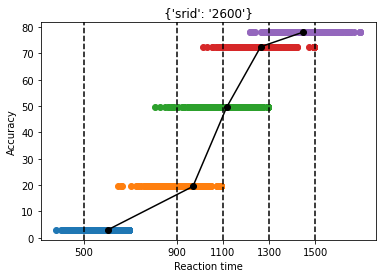

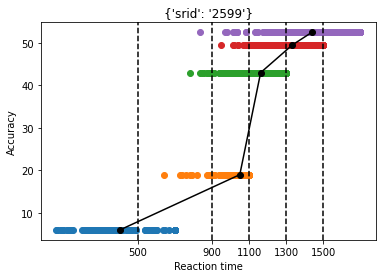

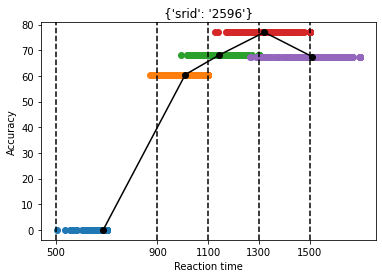

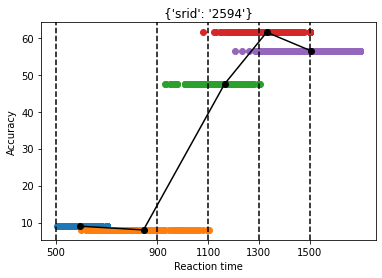

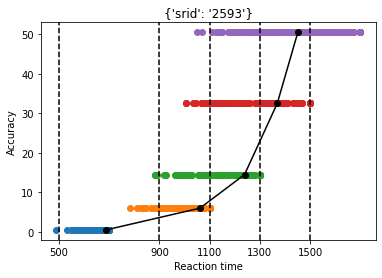

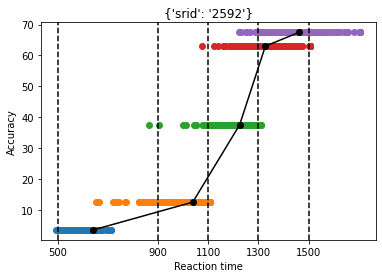

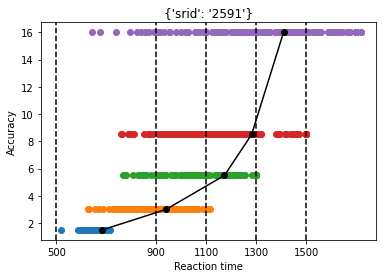

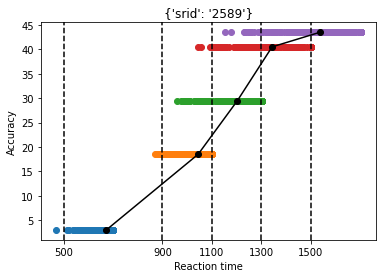

In [13]:
for i, (blocked_data, df) in enumerate(zip(blocked_datas, dfs)):
	plt.figure()

	accs = []
	mean_times = []
	for j, block in enumerate(blocks[1:]):
		acc = 100 * blocked_data[block]['correct'].sum() / len(blocked_data[block]['correct'])
		accs.append(acc)
		mean_times.append(np.mean(blocked_data[block]['duration']))

		plt.scatter(blocked_data[block]['duration'], [acc]*len(blocked_data[block]), label=block) # 200 + mt
		plt.axvline(times[j], color='k', linestyle='--')
		
	plt.plot(mean_times, accs, 'ko-')
	# plt.axhline(y=cat_accs[i], color='k', linestyle='--')
	plt.xlabel("Reaction time")
	plt.ylabel("Accuracy")
	# plt.yticks(range(0,110,10))
	plt.xticks(times)
	plt.title(df['url'][0])

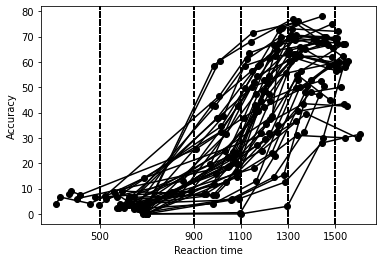

In [14]:
plt.figure()
throw_out = list(map(str,[
	# 2543, 2541, 2530
	2580, 2581,
	2619, 2615, 2591
]))
for i, (blocked_data, df) in enumerate(zip(blocked_datas, dfs)):
	if df['url'][0]['srid'] in throw_out:
		continue

	accs = []
	mean_times = []
	for j, block in enumerate(blocks[1:]):
		acc = 100 * blocked_data[block]['correct'].sum() / len(blocked_data[block]['correct'])
		accs.append(acc)
		mean_times.append(np.mean(blocked_data[block]['duration']))

		# plt.scatter(blocked_data[block]['duration'], [acc]*len(blocked_data[block]), label=block) # 200 + mt
		plt.axvline(times[j], color='k', linestyle='--')
		
	plt.plot(mean_times, accs, 'ko-')
	# plt.axhline(y=cat_accs[i], color='k', linestyle='--')
	plt.xlabel("Reaction time")
	plt.ylabel("Accuracy")
	# plt.yticks(range(0,110,10))
	plt.xticks(times)

Text(0.5, 1.0, 'Descending')

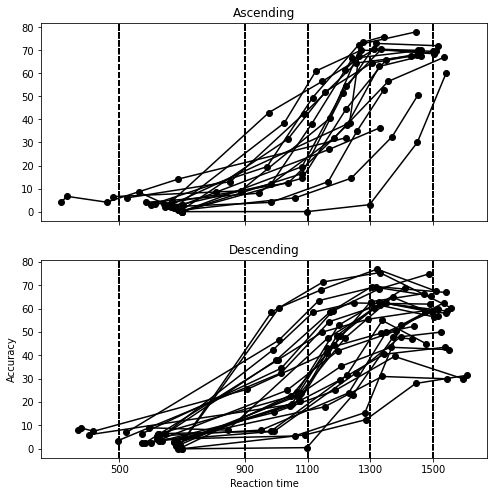

In [15]:
fig, axs = plt.subplots(2,1, figsize=(8,8), sharex=True)
for i, (blocked_data, df) in enumerate(zip(blocked_datas, dfs)):
	if df['url'][0]['srid'] in throw_out:
		continue

	if df.iloc[500]['order'] == 1.0:
		ax = axs[0]	
	elif df.iloc[500]['order'] == -1.0:
		ax = axs[1]
	else:
		raise ValueError("Order not 1 or -1")

	accs = []
	mean_times = []
	for j, block in enumerate(blocks[1:]):
		acc = 100 * blocked_data[block]['correct'].sum() / len(blocked_data[block]['correct'])
		accs.append(acc)
		mean_times.append(np.mean(blocked_data[block]['duration']))

		# plt.scatter(blocked_data[block]['duration'], [acc]*len(blocked_data[block]), label=block) # 200 + mt
		ax.axvline(times[j], color='k', linestyle='--')
		
	ax.plot(mean_times, accs, 'ko-')

# plt.axhline(y=cat_accs[i], color='k', linestyle='--')
plt.xlabel("Reaction time")
plt.ylabel("Accuracy")
# plt.yticks(range(0,110,10))
plt.xticks(times)
axs[0].set_title("Ascending")
axs[1].set_title("Descending")

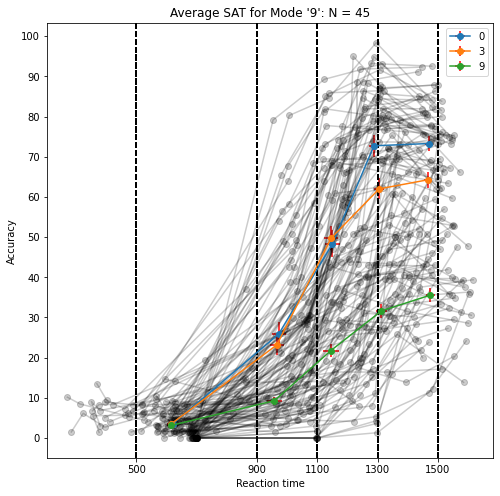

In [16]:
# PLOTTING MEAN SAT CURVE FOR MODES SEPARATELY
plt.figure(figsize=(8,8))
for mode in [0, 3, 9]:
	all_accs = []
	all_mean_times = []
	for i, (blocked_data, df) in enumerate(zip(blocked_datas, dfs)):
		if df['url'][0]['srid'] in throw_out:
			continue

		accs = []
		mean_times = []
		for j, block in enumerate(blocks[1:]):
			mode_blocked_data = blocked_data[block].loc[blocked_data[block]['mode'] == mode]
			acc = 100 * mode_blocked_data['correct'].sum() / len(mode_blocked_data['correct'])
			accs.append(acc)
			mean_times.append(np.mean(mode_blocked_data['duration']))

		all_accs.append(accs)
		all_mean_times.append(mean_times)

	all_accs = np.array(all_accs)
	all_mean_times = np.array(all_mean_times)

	# COPIED FROM PREVIOUS CELL WHICH PLOTS ALL OBSERVERS SEPARATELY
	for i, (blocked_data, df) in enumerate(zip(blocked_datas, dfs)):
		if df['url'][0]['srid'] in throw_out:
			continue

		accs = []
		mean_times = []
		for j, block in enumerate(blocks[1:]):
			mode_blocked_data = blocked_data[block].loc[blocked_data[block]['mode'] == mode]
			acc = 100 * mode_blocked_data['correct'].sum() / len(mode_blocked_data['correct'])
			accs.append(acc)
			mean_times.append(np.mean(mode_blocked_data['duration']))

			# plt.scatter(blocked_data[block]['duration'], [acc]*len(blocked_data[block]), label=block) # 200 + mt
			plt.axvline(times[j], color='k', linestyle='--')
			
		plt.plot(mean_times, accs, 'ko-', alpha=0.1)
		# plt.axhline(y=cat_accs[i], color='k', linestyle='--')
		plt.xlabel("Reaction time")
		plt.ylabel("Accuracy")
		plt.yticks(range(0,110,10))
		plt.xticks(times)
		plt.title(df['url'][0])

	plt.title("Average SAT for Mode '{}': N = {}".format(mode, len(dfs) - len(throw_out)))
	plt.errorbar(
		all_mean_times.mean(axis=0),
		all_accs.mean(axis=0),
		yerr=all_accs.std(axis=0)/np.sqrt(len(dfs)),
		xerr=all_mean_times.std(axis=0)/np.sqrt(len(dfs)),
		marker='o',
		linestyle = '-',
		# color='b',
		ecolor='r',
		label=mode)
plt.legend()
plt.show()

## 